#### Nama: Kurniawati Cricella Maria Dhiu Pala
#### Nim: 195314098
#### TUGAS AKHIR

#### Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#### Baca Data

In [2]:
# Membaca data dengan format CSV
data = pd.read_csv('TUGAS AKHIR.csv',delimiter=",")
data

,JK,Usia,BB,TB,StatusGizi,Label
0,L,7,6.5,63.0,Gizi Baik,Stunting
1,L,1,4.5,52.0,Risiko Obesitas,Normal
2,P,17,10.2,78.2,Gizi Baik,Normal
3,P,23,9.3,80.2,Gizi Baik,Normal
4,L,18,12.0,84.0,Gizi Baik,Normal
...,...,...,...,...,...,...
1325,L,2,3.3,49.4,Gizi Kurang,Stunting
1326,P,13,7.6,69.3,Gizi Baik,Stunting
1327,L,23,8.6,80.0,Gizi Baik,Stunting
1328,L,12,8.0,67.3,Gizi Baik,Stunting


#### Visualisasi Kelas

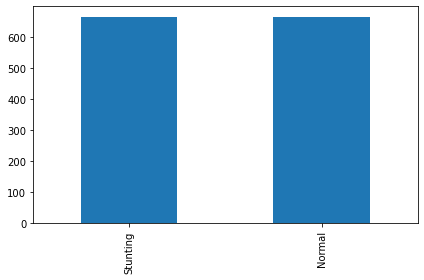

In [3]:
# Visualisasi atribut kelas/label
data['Label'].value_counts()
# Menampilkan jumlah atribut kelas dalam bentuk plot
data['Label'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

#### LABELING DATA

#### Label Encoder

In [4]:
# Label encoder(Mengubah data teks menjadi numerik)
# Mengubah data pada kolom atribut JK, status gizi dan label 
# menjadi data numerik
data['JK'] = encoder.fit_transform (data['JK'])
data['StatusGizi'] = encoder.fit_transform (data['StatusGizi'])
data['Label'] = encoder.fit_transform (data['Label'])
data

,JK,Usia,BB,TB,StatusGizi,Label
0,0,7,6.5,63.0,0,1
1,0,1,4.5,52.0,3,0
2,1,17,10.2,78.2,0,0
3,1,23,9.3,80.2,0,0
4,0,18,12.0,84.0,0,0
...,...,...,...,...,...,...
1325,0,2,3.3,49.4,1,1
1326,1,13,7.6,69.3,0,1
1327,0,23,8.6,80.0,0,1
1328,0,12,8.0,67.3,0,1


#### PREPROCESSING

#### Cek Missing Value

In [5]:
# Mengecek data yang mengalami missing value
data.isna().sum()

JK            0
Usia          0
BB            0
TB            0
StatusGizi    0
Label         0
dtype: int64

#### Seleksi Atribut (Menggunakan Information Gain dan Chisquare)

In [6]:
# Memisahkan fitur dan label
X = data.drop('Label',axis=1) #Fitur
Y = data['Label'] #label

In [7]:
# Information Gain
from sklearn.feature_selection import mutual_info_classif
# Melakukan seleksi untuk 5 fitur terbaik menggunakan Information Gain
selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_new = selector.fit_transform(X, Y)
# Menampilkan fitur terbaik beserta dengan skornya
scores = selector.scores_
selected_features = pd.DataFrame({'Attribute': X.columns, 'Score': scores})
selected_features = selected_features.sort_values(by='Score', ascending=False)
print("Selected Features:")
print(selected_features)

Selected Features:
    Attribute     Score
3          TB  0.228752
2          BB  0.226216
1        Usia  0.157396
4  StatusGizi  0.050215
0          JK  0.008320


#### Drop Atribut

In [8]:
# Menghapus 3 atribut yang memiliki skor paling rendah pada tahap
# seleksi atribut
X = data.drop('JK',axis=1)
Y = data.JK

In [9]:
X_Lab = X.drop('Label',axis=1)
Y_Lab = X['Label']
X_Lab

,Usia,BB,TB,StatusGizi
0,7,6.5,63.0,0
1,1,4.5,52.0,3
2,17,10.2,78.2,0
3,23,9.3,80.2,0
4,18,12.0,84.0,0
...,...,...,...,...
1325,2,3.3,49.4,1
1326,13,7.6,69.3,0
1327,23,8.6,80.0,0
1328,12,8.0,67.3,0


#### Transformasi Data (Pengujian dengan dua metode normalisasi)

#### Normalisasi Min-Max

In [10]:
#Transformasi MinMax
data_min = np.min(X_Lab)
data_max = np.max(X_Lab)
data_standar = (X_Lab - data_min) / (data_max - data_min)
data_standar

C:\Users\ASUS\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,Usia,BB,TB,StatusGizi
0,0.118644,0.226994,0.561122,0.000000
1,0.016949,0.104294,0.450902,1.000000
2,0.288136,0.453988,0.713427,0.000000
3,0.389831,0.398773,0.733467,0.000000
4,0.305085,0.564417,0.771543,0.000000
...,...,...,...,...
1325,0.033898,0.030675,0.424850,0.333333
1326,0.220339,0.294479,0.624248,0.000000
1327,0.389831,0.355828,0.731463,0.000000
1328,0.203390,0.319018,0.604208,0.000000


#### Split Data menjadi 90:10 (Normalisasi Min-max)

In [11]:
from sklearn.model_selection import train_test_split
# Membagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(data_standar, Y_Lab, test_size=0.1, random_state=42)
print('\nDimension of Xtrain :',X_train.shape)
print('\nDimension of Xtest :',X_test.shape)
print('\nDimension of Ytrain :',y_train.shape)
print('\nDimension of Ytest :',y_test.shape)


Dimension of Xtrain : (1197, 4)

Dimension of Xtest : (133, 4)

Dimension of Ytrain : (1197,)

Dimension of Ytest : (133,)


#### PEMODELAN dan PENGUJIAN 

### Pengujian model dengan Normalisasi Min-max

#### A. Modeling Naive Bayes

#### UJI DATA TRAINING DAN MODELING GAUSSIANNB

#### CV = 7

#### GaussianNB

In [12]:
# Klasifikasi Gaussian
from sklearn.model_selection import cross_val_score
kfold1 = KFold(n_splits=7, random_state=42, shuffle=True)
Gnb = GaussianNB()
results = cross_val_score(Gnb, X_train,y_train,cv=kfold1)

In [13]:
# Membagi data menjadi 2 dataset (Training dan Testing)
for i, (train_index, test_index) in enumerate(kfold1.split(X_train, y_train)):
    Xtrain, Xvalid = X_train.iloc[train_index], X_train.iloc[test_index]
    ytrain, yvalid = y_train.iloc[train_index], y_train.iloc[test_index]

In [14]:
print('\nDimension of Xtrain :',Xtrain.shape)
print('\nDimension of Xtest :',Xvalid.shape)
print('\nDimension of Ytrain :',ytrain.shape)
print('\nDimension of Ytest :',yvalid.shape)


Dimension of Xtrain : (1026, 4)

Dimension of Xtest : (171, 4)

Dimension of Ytrain : (1026,)

Dimension of Ytest : (171,)


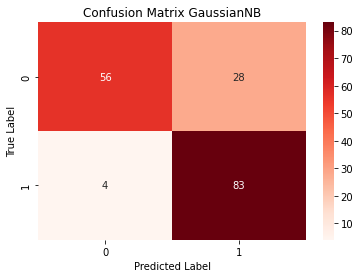

In [15]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Gnb.fit(Xtrain, ytrain)
ypred = Gnb.predict(Xvalid)
# membuat confusion matrix
cm = confusion_matrix(yvalid, ypred)
#cm
#membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Reds")
plt.title("Confusion Matrix GaussianNB")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [16]:
# Modeling Naive Bayes
Gnb.fit(Xtrain, ytrain)
ypred = Gnb.predict(Xvalid)
print ("Hasil Klasifikasi Report\n")
print (classification_report(yvalid, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       0.93      0.67      0.78        84
           1       0.75      0.95      0.84        87

    accuracy                           0.81       171
   macro avg       0.84      0.81      0.81       171
weighted avg       0.84      0.81      0.81       171



#### UJI DATA TRAINING DAN MODELING BERNOULLINB

#### BernoulliNB

In [17]:
# Klasifikasi Bernoulli
kfold2 = KFold(n_splits=7, random_state=42, shuffle=True)
Bnb = BernoulliNB()
results = cross_val_score(Bnb, X_train,y_train,cv=kfold2)

In [18]:
# Membagi data menjadi 2 dataset (Training dan Testing)
for i, (train_index, test_index) in enumerate(kfold2.split(X_train, y_train)):
    Xtrain, Xvalid = X_train.iloc[train_index], X_train.iloc[test_index]
    ytrain, yvalid = y_train.iloc[train_index], y_train.iloc[test_index]

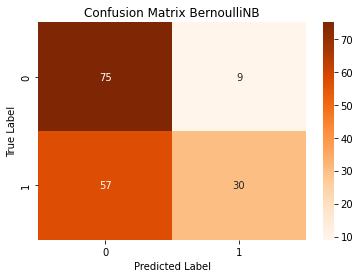

In [19]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Bnb.fit(Xtrain, ytrain)
ypred = Bnb.predict(Xvalid)
# membuat confusion matrix
cm = confusion_matrix(yvalid, ypred)
# membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Oranges")
plt.title("Confusion Matrix BernoulliNB")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [20]:
# Modeling Naive Bayes
Bnb.fit(Xtrain, ytrain)
ypred = Bnb.predict(Xvalid)
print ("Hasil Klasifikasi Report\n")
print (classification_report(yvalid, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       0.57      0.89      0.69        84
           1       0.77      0.34      0.48        87

    accuracy                           0.61       171
   macro avg       0.67      0.62      0.59       171
weighted avg       0.67      0.61      0.58       171



#### CV = 10

#### UJI DATA TRAINING DAN MODELING GAUSSIANNB

#### GaussianNB

In [21]:
from sklearn.model_selection import cross_val_score
kfold3 = KFold(n_splits=10, random_state=42, shuffle=True)
Gnb = GaussianNB()
results = cross_val_score(Gnb, X_train,y_train,cv=kfold3)

In [22]:
# Membagi data menjadi 2 dataset (Training dan Testing)
for i, (train_index, test_index) in enumerate(kfold3.split(X_train, y_train)):
    Xtrain, Xvalid = X_train.iloc[train_index], X_train.iloc[test_index]
    ytrain, yvalid = y_train.iloc[train_index], y_train.iloc[test_index]

In [23]:
print('\nDimension of Xtrain :',Xtrain.shape)
print('\nDimension of Xtest :',Xvalid.shape)
print('\nDimension of Ytrain :',ytrain.shape)
print('\nDimension of Ytest :',yvalid.shape)


Dimension of Xtrain : (1078, 4)

Dimension of Xtest : (119, 4)

Dimension of Ytrain : (1078,)

Dimension of Ytest : (119,)


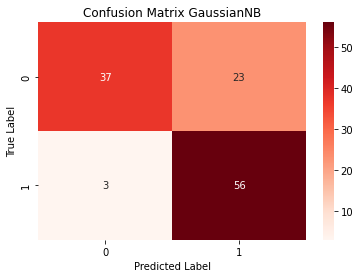

In [24]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Gnb.fit(Xtrain, ytrain)
ypred = Gnb.predict(Xvalid)
# membuat confusion matrix
cm = confusion_matrix(yvalid, ypred)
# membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Reds")
plt.title("Confusion Matrix GaussianNB")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [25]:
# Modeling Naive Bayes
Gnb.fit(Xtrain, ytrain)
ypred = Gnb.predict(Xvalid)
print ("Hasil Klasifikasi Report\n")
print (classification_report(yvalid, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       0.93      0.62      0.74        60
           1       0.71      0.95      0.81        59

    accuracy                           0.78       119
   macro avg       0.82      0.78      0.78       119
weighted avg       0.82      0.78      0.78       119



#### UJI DATA TRAINING DAN MODELING BERNOULLINB

#### BernoulliNB

In [26]:
# Klasifikasi Bernoulli
kfold4 = KFold(n_splits=10, random_state=42, shuffle=True)
Bnb = BernoulliNB()
results = cross_val_score(Bnb, X_train, y_train, cv=kfold4)

In [27]:
# Membagi data menjadi 2 dataset (Training dan Testing)
for i, (train_index, test_index) in enumerate(kfold4.split(X_train, y_train)):
    Xtrain, Xvalid = X_train.iloc[train_index], X_train.iloc[test_index]
    ytrain, yvalid = y_train.iloc[train_index], y_train.iloc[test_index]

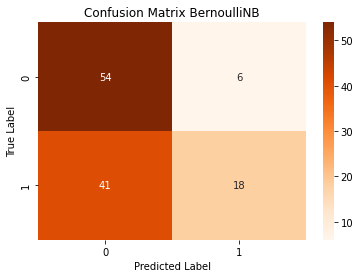

In [28]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Bnb.fit(Xtrain, ytrain)
ypred = Bnb.predict(Xvalid)
# membuat confusion matrix
cm = confusion_matrix(yvalid, ypred)
# membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Oranges")
plt.title("Confusion Matrix BernoulliNB")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [29]:
# Modeling Naive Bayes
Bnb.fit(Xtrain, ytrain)
ypred = Bnb.predict(Xvalid)
print ("Hasil Klasifikasi Report\n")
print (classification_report(yvalid, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       0.57      0.90      0.70        60
           1       0.75      0.31      0.43        59

    accuracy                           0.61       119
   macro avg       0.66      0.60      0.57       119
weighted avg       0.66      0.61      0.57       119



#### B. Modelling SVM

#### CV = 7

#### UJI DATA TRAINING DAN MODELING POLINOMIAL KERNEL

#### Polynomial Kernel

In [30]:
kfold5 = KFold(n_splits=7, random_state=42, shuffle=True)
Poli = svm.SVC(kernel='poly', degree=3, C=1)
results = cross_val_score(Poli, X_train, y_train,cv=kfold5)

In [31]:
# Membagi data menjadi 2 dataset (Training dan Testing)
for i, (train_index, test_index) in enumerate(kfold5.split(X_train, y_train)):
    Xtrain, Xvalid = X_train.iloc[train_index], X_train.iloc[test_index]
    ytrain, yvalid = y_train.iloc[train_index], y_train.iloc[test_index]

In [32]:
print('\nDimension of Xtrain :',Xtrain.shape)
print('\nDimension of Xtest :',Xvalid.shape)
print('\nDimension of Ytrain :',ytrain.shape)
print('\nDimension of Ytest :',yvalid.shape)


Dimension of Xtrain : (1026, 4)

Dimension of Xtest : (171, 4)

Dimension of Ytrain : (1026,)

Dimension of Ytest : (171,)


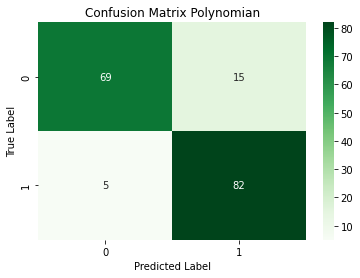

In [33]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Poli.fit(Xtrain, ytrain)
ypred = Poli.predict(Xvalid)
# membuat confusion matrix
cm = confusion_matrix(yvalid, ypred)
# membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Greens")
plt.title("Confusion Matrix Polynomian")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [34]:
# Modeling Support Vector Machine
Poli.fit(Xtrain, ytrain)
ypred = Poli.predict(Xvalid)
print ("Hasil Klasifikasi Report\n")
print (classification_report(yvalid, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        84
           1       0.85      0.94      0.89        87

    accuracy                           0.88       171
   macro avg       0.89      0.88      0.88       171
weighted avg       0.89      0.88      0.88       171



#### UJI DATA TRAINING DAN MODELING RBF KERNEL

#### RBF Kernel

In [35]:
kfold6 = KFold(n_splits=7, random_state=42, shuffle=True)
Rbf = svm.SVC(kernel='rbf', gamma='scale', C=1)
results = cross_val_score(Rbf, X_train, y_train, cv=kfold6)

In [36]:
# Membagi data menjadi 2 dataset (Training dan Testing)
for i, (train_index, test_index) in enumerate(kfold6.split(X_train, y_train)):
    Xtrain, Xvalid = X_train.iloc[train_index], X_train.iloc[test_index]
    ytrain, yvalid = y_train.iloc[train_index], y_train.iloc[test_index]

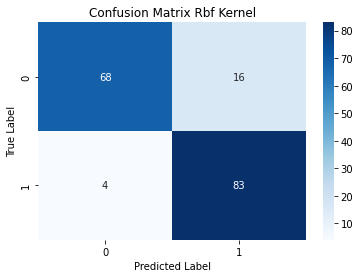

In [37]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Rbf.fit(Xtrain, ytrain)
ypred = Rbf.predict(Xvalid)
# membuat confusion matrix
cm = confusion_matrix(yvalid, ypred)
# membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix Rbf Kernel")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [38]:
# Modeling Support Vector Machine
Rbf.fit(Xtrain, ytrain)
ypred = Rbf.predict(Xvalid)
print ("Hasil Klasifikasi Report\n")
print (classification_report(yvalid, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        84
           1       0.84      0.95      0.89        87

    accuracy                           0.88       171
   macro avg       0.89      0.88      0.88       171
weighted avg       0.89      0.88      0.88       171



#### CV = 10

#### UJI DATA TRAINING DAN MODELING POLYNOMIAL KERNEL 

#### Polynomial Kernel

In [39]:
kfold7 = KFold(n_splits=10, random_state=42, shuffle=True)
Poli = svm.SVC(kernel='poly', degree=3, C=1)
results = cross_val_score(Poli, X_train, y_train, cv=kfold7)

In [40]:
# Membagi data menjadi 2 dataset (Training dan Testing)
for i, (train_index, test_index) in enumerate(kfold7.split(X_train, y_train)):
    Xtrain, Xvalid = X_train.iloc[train_index], X_train.iloc[test_index]
    ytrain, yvalid = y_train.iloc[train_index], y_train.iloc[test_index]

In [41]:
print('\nDimension of Xtrain :',Xtrain.shape)
print('\nDimension of Xtest :',Xvalid.shape)
print('\nDimension of Ytrain :',ytrain.shape)
print('\nDimension of Ytest :',yvalid.shape)


Dimension of Xtrain : (1078, 4)

Dimension of Xtest : (119, 4)

Dimension of Ytrain : (1078,)

Dimension of Ytest : (119,)


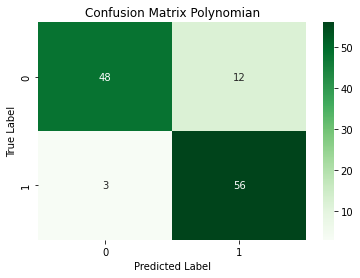

In [42]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Poli.fit(Xtrain, ytrain)
ypred = Poli.predict(Xvalid)
# membuat confusion matrix
cm = confusion_matrix(yvalid, ypred)
# membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Greens")
plt.title("Confusion Matrix Polynomian")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [43]:
# Modeling Support Vector Machine
Poli.fit(Xtrain, ytrain)
ypred = Poli.predict(Xvalid)
print ("Hasil Klasifikasi Report\n")
print (classification_report(yvalid, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       0.94      0.80      0.86        60
           1       0.82      0.95      0.88        59

    accuracy                           0.87       119
   macro avg       0.88      0.87      0.87       119
weighted avg       0.88      0.87      0.87       119



#### UJI DATA TRAINING DAN MODELING RBF KERNEL

#### RBF Kernel

In [44]:
kfold8 = KFold(n_splits=10, random_state=42, shuffle=True)
Rbf = svm.SVC(kernel='rbf', gamma='scale', C=1)
results = cross_val_score(Rbf, X_train, y_train, cv=kfold8)

In [45]:
# Membagi data menjadi 2 dataset (Training dan Testing)
for i, (train_index, test_index) in enumerate(kfold8.split(X_train, y_train)):
    Xtrain, Xvalid = X_train.iloc[train_index], X_train.iloc[test_index]
    ytrain, yvalid = y_train.iloc[train_index], y_train.iloc[test_index]

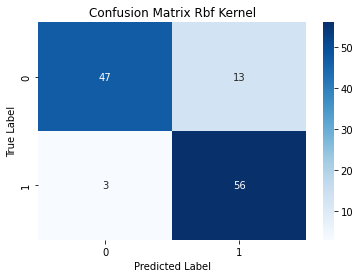

In [46]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Rbf.fit(Xtrain, ytrain)
ypred = Rbf.predict(Xvalid)
# membuat confusion matrix
cm = confusion_matrix(yvalid, ypred)
# membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix Rbf Kernel")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [47]:
# Modeling Support Vector Machine
Rbf.fit(Xtrain, ytrain)
ypred = Rbf.predict(Xvalid)
print ("Hasil Klasifikasi Report\n")
print (classification_report(yvalid, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       0.94      0.78      0.85        60
           1       0.81      0.95      0.87        59

    accuracy                           0.87       119
   macro avg       0.88      0.87      0.86       119
weighted avg       0.88      0.87      0.86       119



### UJI DATA TESTING DENGAN NORMALISASI MIN-MAX

#### TESTING DATA 1

#### GAUSSIAN NAIVE BAYES

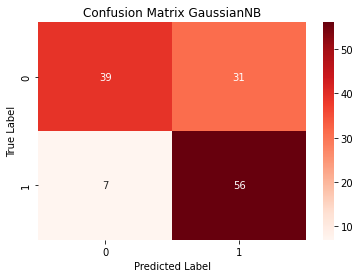

In [48]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Gnb.fit(Xtrain, ytrain)
ypred = Gnb.predict(X_test)
# membuat confusion matrix
cm = confusion_matrix(y_test, ypred)
#cm
#membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Reds")
plt.title("Confusion Matrix GaussianNB")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [49]:
# Modeling Naive Bayes
Gnb.fit(Xtrain, ytrain)
ypred = Gnb.predict(X_test)
print ("Hasil Klasifikasi Report\n")
print (classification_report(y_test, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       0.85      0.56      0.67        70
           1       0.64      0.89      0.75        63

    accuracy                           0.71       133
   macro avg       0.75      0.72      0.71       133
weighted avg       0.75      0.71      0.71       133



#### BERNOULLI NAIVE BAYES

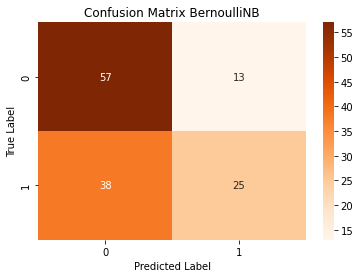

In [50]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Bnb.fit(Xtrain, ytrain)
ypred = Bnb.predict(X_test)
# membuat confusion matrix
cm = confusion_matrix(y_test, ypred)
# membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Oranges")
plt.title("Confusion Matrix BernoulliNB")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [51]:
# Modeling Naive Bayes
Bnb.fit(Xtrain, ytrain)
ypred = Bnb.predict(X_test)
print ("Hasil Klasifikasi Report\n")
print (classification_report(y_test, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       0.60      0.81      0.69        70
           1       0.66      0.40      0.50        63

    accuracy                           0.62       133
   macro avg       0.63      0.61      0.59       133
weighted avg       0.63      0.62      0.60       133



#### POLYNOMIAL KERNEL

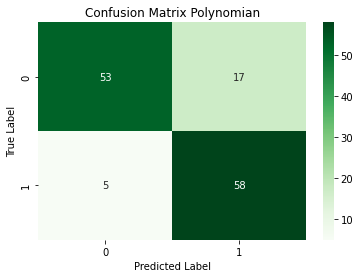

In [52]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Poli.fit(Xtrain, ytrain)
ypred = Poli.predict(X_test)
# membuat confusion matrix
cm = confusion_matrix(y_test, ypred)
# membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Greens")
plt.title("Confusion Matrix Polynomian")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [53]:
# Modeling Support Vector Machine
Poli.fit(Xtrain, ytrain)
ypred = Poli.predict(X_test)
print ("Hasil Klasifikasi Report\n")
print (classification_report(y_test, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       0.91      0.76      0.83        70
           1       0.77      0.92      0.84        63

    accuracy                           0.83       133
   macro avg       0.84      0.84      0.83       133
weighted avg       0.85      0.83      0.83       133



#### RBF KERNEL

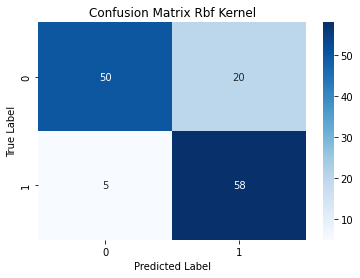

In [54]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Rbf.fit(Xtrain, ytrain)
ypred = Rbf.predict(X_test)
# membuat confusion matrix
cm = confusion_matrix(y_test, ypred)
# membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix Rbf Kernel")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [55]:
# Modeling Support Vector Machine
Rbf.fit(Xtrain, ytrain)
ypred = Rbf.predict(X_test)
print ("Hasil Klasifikasi Report\n")
print (classification_report(y_test, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       0.91      0.71      0.80        70
           1       0.74      0.92      0.82        63

    accuracy                           0.81       133
   macro avg       0.83      0.82      0.81       133
weighted avg       0.83      0.81      0.81       133



#### TESTING DATA 2

#### GAUSSIAN NAIVE BAYES

In [56]:
Xtrain1, Xtest1, ytrain1, ytest1 = train_test_split(X_test, y_test, test_size=0.1, random_state=42)
print('\nDimension of Xtrain :',Xtrain1.shape)
print('\nDimension of Xtest :',Xtest1.shape)
print('\nDimension of Ytrain :',ytrain1.shape)
print('\nDimension of Ytest :',ytest1.shape)


Dimension of Xtrain : (119, 4)

Dimension of Xtest : (14, 4)

Dimension of Ytrain : (119,)

Dimension of Ytest : (14,)


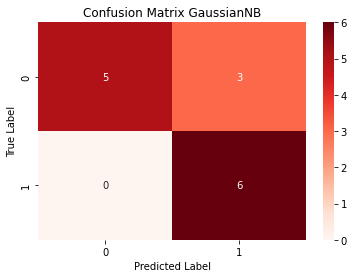

In [57]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Gnb.fit(Xtrain, ytrain)
ypred = Gnb.predict(Xtest1)
# membuat confusion matrix
cm = confusion_matrix(ytest1, ypred)
#cm
#membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Reds")
plt.title("Confusion Matrix GaussianNB")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [58]:
# Modeling Naive Bayes
Gnb.fit(Xtrain, ytrain)
ypred = Gnb.predict(Xtest1)
print ("Hasil Klasifikasi Report\n")
print (classification_report(ytest1, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.67      1.00      0.80         6

    accuracy                           0.79        14
   macro avg       0.83      0.81      0.78        14
weighted avg       0.86      0.79      0.78        14



#### BERNOULLI NAIVE BAYES

In [59]:
Xtrain1, Xtest1, ytrain1, ytest1 = train_test_split(X_test, y_test, test_size=0.1, random_state=42)
print('\nDimension of Xtrain :',Xtrain1.shape)
print('\nDimension of Xtest :',Xtest1.shape)
print('\nDimension of Ytrain :',ytrain1.shape)
print('\nDimension of Ytest :',ytest1.shape)


Dimension of Xtrain : (119, 4)

Dimension of Xtest : (14, 4)

Dimension of Ytrain : (119,)

Dimension of Ytest : (14,)


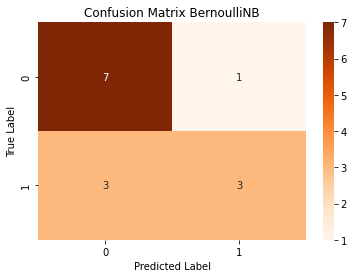

In [60]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Bnb.fit(Xtrain, ytrain)
ypred = Bnb.predict(Xtest1)
# membuat confusion matrix
cm = confusion_matrix(ytest1, ypred)
# membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Oranges")
plt.title("Confusion Matrix BernoulliNB")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [61]:
# Modeling Naive Bayes
Bnb.fit(Xtrain, ytrain)
ypred = Bnb.predict(Xtest1)
print ("Hasil Klasifikasi Report\n")
print (classification_report(ytest1, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.75      0.50      0.60         6

    accuracy                           0.71        14
   macro avg       0.72      0.69      0.69        14
weighted avg       0.72      0.71      0.70        14



#### POLYNOMIAL KERNEL

In [62]:
Xtrain1, Xtest1, ytrain1, ytest1 = train_test_split(X_test, y_test, test_size=0.1, random_state=42)
print('\nDimension of Xtrain :',Xtrain1.shape)
print('\nDimension of Xtest :',Xtest1.shape)
print('\nDimension of Ytrain :',ytrain1.shape)
print('\nDimension of Ytest :',ytest1.shape)


Dimension of Xtrain : (119, 4)

Dimension of Xtest : (14, 4)

Dimension of Ytrain : (119,)

Dimension of Ytest : (14,)


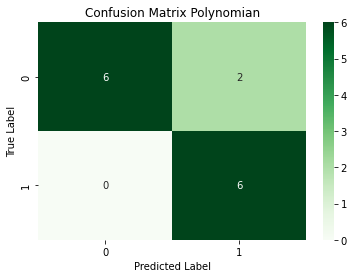

In [63]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Poli.fit(Xtrain, ytrain)
ypred = Poli.predict(Xtest1)
# membuat confusion matrix
cm = confusion_matrix(ytest1, ypred)
# membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Greens")
plt.title("Confusion Matrix Polynomian")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [64]:
# Modeling Support Vector Machine
Poli.fit(Xtrain, ytrain)
ypred = Poli.predict(Xtest1)
print ("Hasil Klasifikasi Report\n")
print (classification_report(ytest1, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.75      1.00      0.86         6

    accuracy                           0.86        14
   macro avg       0.88      0.88      0.86        14
weighted avg       0.89      0.86      0.86        14



#### RBF KERNEL

In [65]:
Xtrain1, Xtest1, ytrain1, ytest1 = train_test_split(X_test, y_test, test_size=0.1, random_state=42)
print('\nDimension of Xtrain :',Xtrain1.shape)
print('\nDimension of Xtest :',Xtest1.shape)
print('\nDimension of Ytrain :',ytrain1.shape)
print('\nDimension of Ytest :',ytest1.shape)


Dimension of Xtrain : (119, 4)

Dimension of Xtest : (14, 4)

Dimension of Ytrain : (119,)

Dimension of Ytest : (14,)


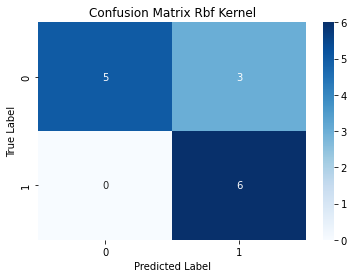

In [66]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Rbf.fit(Xtrain, ytrain)
ypred = Rbf.predict(Xtest1)
# membuat confusion matrix
cm = confusion_matrix(ytest1, ypred)
# membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix Rbf Kernel")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [67]:
# Modeling Support Vector Machine
Rbf.fit(Xtrain, ytrain)
ypred = Rbf.predict(Xtest1)
print ("Hasil Klasifikasi Report\n")
print (classification_report(ytest1, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.67      1.00      0.80         6

    accuracy                           0.79        14
   macro avg       0.83      0.81      0.78        14
weighted avg       0.86      0.79      0.78        14



### Pengujian model dengan normalisasi Z-score

#### Normalisasi Z-Score

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_Lab)
x_scaler = pd.DataFrame(scaler.transform(X_Lab),columns = X_Lab.columns)
x_scaler

,Usia,BB,TB,StatusGizi
0,-1.035808,-1.122519,-1.100879,-0.548437
1,-1.439625,-1.780533,-1.939712,1.902027
2,-0.362778,0.094806,0.058237,-0.548437
3,0.041040,-0.201300,0.210752,-0.548437
4,-0.295475,0.687018,0.500531,-0.548437
...,...,...,...,...
1325,-1.372322,-2.175341,-2.137982,0.268384
1326,-0.631990,-0.760612,-0.620456,-0.548437
1327,0.041040,-0.431605,0.195500,-0.548437
1328,-0.699293,-0.629009,-0.772971,-0.548437


#### Split Data menjadi 90:10 (Normalisasi Z-Score)

In [69]:
from sklearn.model_selection import train_test_split
# Membagi data menjadi data training dan data testing
Xtraining, Xtesting, ytraining, ytesting = train_test_split(x_scaler, Y_Lab, test_size=0.1, random_state=42)
print('\nDimension of Xtrain :',Xtraining.shape)
print('\nDimension of Xtest :',Xtesting.shape)
print('\nDimension of Ytrain :',ytraining.shape)
print('\nDimension of Ytest :',ytesting.shape)


Dimension of Xtrain : (1197, 4)

Dimension of Xtest : (133, 4)

Dimension of Ytrain : (1197,)

Dimension of Ytest : (133,)


#### A. Model Naive Bayes

#### CV = 7

#### UJI DATA TRAINING DAN MODELING GAUSSIANNB

##### GaussianNB

In [70]:
# Klasifikasi Gaussian 
from sklearn.model_selection import cross_val_score
kfold9 = KFold(n_splits=7, random_state=42, shuffle=True)
Gnb = GaussianNB()
results = cross_val_score(Gnb, Xtraining, ytraining, cv=kfold9)

In [71]:
# Membagi data menjadi 2 dataset (Training dan Testing)
for i, (train_index, test_index) in enumerate(kfold9.split(Xtraining, ytraining)):
    Xtrain1, Xvalid1 = Xtraining.iloc[train_index], Xtraining.iloc[test_index]
    ytrain1, yvalid1 = ytraining.iloc[train_index], ytraining.iloc[test_index]

In [72]:
print('\nDimension of Xtrain :',Xtrain1.shape)
print('\nDimension of Xtest :',Xvalid1.shape)
print('\nDimension of Ytrain :',ytrain1.shape)
print('\nDimension of Ytest :',yvalid1.shape)


Dimension of Xtrain : (1026, 4)

Dimension of Xtest : (171, 4)

Dimension of Ytrain : (1026,)

Dimension of Ytest : (171,)


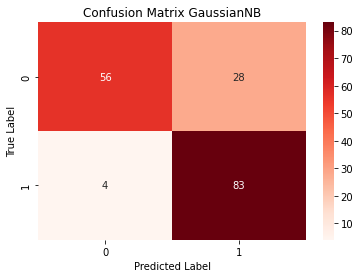

In [73]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Gnb.fit(Xtrain1, ytrain1)
ypred = Gnb.predict(Xvalid1)
# membuat confusion matrix
cm = confusion_matrix(yvalid1, ypred)
# membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Reds")
plt.title("Confusion Matrix GaussianNB")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [74]:
# Modeling Naive Bayes
Gnb.fit(Xtrain1, ytrain1)
ypred = Gnb.predict(Xvalid1) 
print ("Hasil Klasifikasi Report\n")
print (classification_report(yvalid1, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       0.93      0.67      0.78        84
           1       0.75      0.95      0.84        87

    accuracy                           0.81       171
   macro avg       0.84      0.81      0.81       171
weighted avg       0.84      0.81      0.81       171



#### UJI DATA TRAINING DAN MODELING BERNOULLINB

##### BernoulliNB

In [75]:
# Klasifikasi Bernoulli
kfold10 = KFold(n_splits=7, random_state=42, shuffle=True)
Bnb = BernoulliNB()
results = cross_val_score(Bnb, Xtraining, ytraining, cv=kfold10)

In [76]:
# Membagi data menjadi 2 dataset (Training dan Testing)
for i, (train_index, test_index) in enumerate(kfold10.split(Xtraining, ytraining)):
    Xtrain1, Xvalid1 = Xtraining.iloc[train_index], Xtraining.iloc[test_index]
    ytrain1, yvalid1 = ytraining.iloc[train_index], ytraining.iloc[test_index]

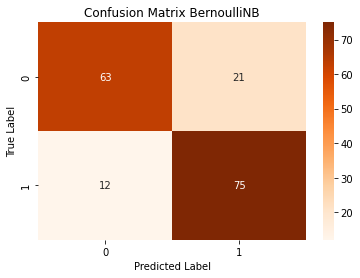

In [77]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Bnb.fit(Xtrain1, ytrain1)
ypred = Bnb.predict(Xvalid1)
# membuat confusion matrix
cm = confusion_matrix(yvalid1, ypred)
# membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Oranges")
plt.title("Confusion Matrix BernoulliNB")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [78]:
# Modeling Naive Bayes
Bnb.fit(Xtrain1, ytrain1)
ypred = Bnb.predict(Xvalid1)
print ("Hasil Klasifikasi Report\n")
print (classification_report(yvalid1, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        84
           1       0.78      0.86      0.82        87

    accuracy                           0.81       171
   macro avg       0.81      0.81      0.81       171
weighted avg       0.81      0.81      0.81       171



#### CV = 10

#### UJI DATA TRAINING DAN MODELING GAUSSIANNB

##### GaussianNB

In [79]:
# Klasifikasi Gaussian 
from sklearn.model_selection import cross_val_score
kfold11 = KFold(n_splits=10, random_state=42, shuffle=True)
Gnb = GaussianNB()
results = cross_val_score(Bnb, Xtraining, ytraining, cv=kfold11)

In [80]:
# Membagi data menjadi 2 dataset (Training dan Testing)
for i, (train_index, test_index) in enumerate(kfold11.split(Xtraining, ytraining)):
    Xtrain1, Xvalid1 = Xtraining.iloc[train_index], Xtraining.iloc[test_index]
    ytrain1, yvalid1 = ytraining.iloc[train_index], ytraining.iloc[test_index]

In [81]:
print('\nDimension of Xtrain :',Xtrain1.shape)
print('\nDimension of Xtest :',Xvalid1.shape)
print('\nDimension of Ytrain :',yvalid1.shape)
print('\nDimension of Ytest :',yvalid1.shape)


Dimension of Xtrain : (1078, 4)

Dimension of Xtest : (119, 4)

Dimension of Ytrain : (119,)

Dimension of Ytest : (119,)


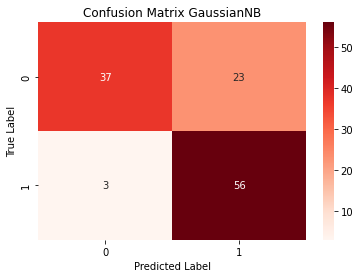

In [82]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Gnb.fit(Xtrain1, ytrain1)
ypred = Gnb.predict(Xvalid1)
# membuat confusion matrix
cm = confusion_matrix(yvalid1, ypred)
# membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Reds")
plt.title("Confusion Matrix GaussianNB")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [83]:
# Modeling Naive Bayes
Gnb.fit(Xtrain1, ytrain1)
ypred = Gnb.predict(Xvalid1) 
print ("Hasil Klasifikasi Report\n")
print (classification_report(yvalid1, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       0.93      0.62      0.74        60
           1       0.71      0.95      0.81        59

    accuracy                           0.78       119
   macro avg       0.82      0.78      0.78       119
weighted avg       0.82      0.78      0.78       119



#### UJI DATA TRAINING DAN MODELING BERNOULLINB

##### BernoulliNB

In [84]:
# Klasifikasi Bernoulli
kfold12 = KFold(n_splits=10, random_state=42, shuffle=True)
Bnb = BernoulliNB()
results = cross_val_score(Bnb, Xtraining, ytraining, cv=kfold12)

In [85]:
# Membagi data menjadi 2 dataset (Training dan Testing)
for i, (train_index, test_index) in enumerate(kfold12.split(Xtraining, ytraining)):
    Xtrain1, Xvalid1 = Xtraining.iloc[train_index], Xtraining.iloc[test_index]
    ytrain1, yvalid1 = ytraining.iloc[train_index], ytraining.iloc[test_index]

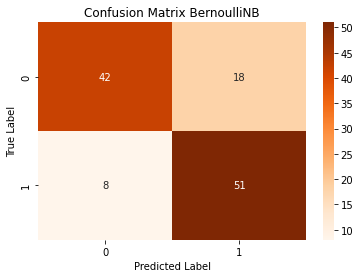

In [86]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Bnb.fit(Xtrain1, ytrain1)
ypred = Bnb.predict(Xvalid1)
# membuat confusion matrix
cm = confusion_matrix(yvalid1, ypred)
# membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Oranges")
plt.title("Confusion Matrix BernoulliNB")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [87]:
# Modeling Naive Bayes
Bnb.fit(Xtrain1, ytrain1)
ypred = Bnb.predict(Xvalid1)
print ("Hasil Klasifikasi Report\n")
print (classification_report(yvalid1, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       0.84      0.70      0.76        60
           1       0.74      0.86      0.80        59

    accuracy                           0.78       119
   macro avg       0.79      0.78      0.78       119
weighted avg       0.79      0.78      0.78       119



#### B. Model SVM

#### CV = 7

#### UJI DATA TRAINING DAN MODELING POLYNOMIAL KERNEL

##### PolynomialKernell

In [88]:
kfold13 = KFold(n_splits=7, random_state=42, shuffle=True)
Poli = svm.SVC(kernel='poly', degree=3, C=1)
results = cross_val_score(Poli, Xtraining, ytraining, cv=kfold13)

In [89]:
# Membagi data menjadi 2 dataset (Training dan Testing)
for i, (train_index, test_index) in enumerate(kfold13.split(Xtraining, ytraining)):
    Xtrain1, Xvalid1 = Xtraining.iloc[train_index], Xtraining.iloc[test_index]
    ytrain1, yvalid1 = ytraining.iloc[train_index], ytraining.iloc[test_index]

In [90]:
print('\nDimension of Xtrain :',Xtrain1.shape)
print('\nDimension of Xtest :',Xvalid1.shape)
print('\nDimension of Ytrain :',ytrain1.shape)
print('\nDimension of Ytest :',yvalid1.shape)


Dimension of Xtrain : (1026, 4)

Dimension of Xtest : (171, 4)

Dimension of Ytrain : (1026,)

Dimension of Ytest : (171,)


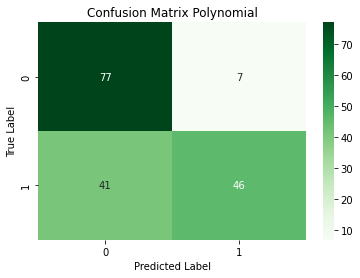

In [91]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Poli.fit(Xtrain1, ytrain1)
ypred = Poli.predict(Xvalid1)
# membuat confusion matrix
cm = confusion_matrix(yvalid1, ypred)
# membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Greens")
plt.title("Confusion Matrix Polynomial")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [92]:
# Modeling Support Vector Machine
Poli.fit(Xtrain1, ytrain1)
ypred = Poli.predict(Xvalid1)
print ("Hasil Klasifikasi Report\n")
print (classification_report(yvalid1, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       0.65      0.92      0.76        84
           1       0.87      0.53      0.66        87

    accuracy                           0.72       171
   macro avg       0.76      0.72      0.71       171
weighted avg       0.76      0.72      0.71       171



#### UJI DATA TRAINING DAN MODELING RBF KERNEL

##### RBFKernell

In [93]:
kfold14 = KFold(n_splits=7, random_state=42, shuffle=True)
Rbf = svm.SVC(kernel='rbf', gamma='scale', C=1)
results = cross_val_score(Rbf, x_scaler, Y_Lab, cv=kfold14)

In [94]:
# Membagi data menjadi 2 dataset (Training dan Testing)
for i, (train_index, test_index) in enumerate(kfold14.split(Xtraining, ytraining)):
    Xtrain1, Xvalid1 = Xtraining.iloc[train_index], Xtraining.iloc[test_index]
    ytrain1, yvalid1 = ytraining.iloc[train_index], ytraining.iloc[test_index]

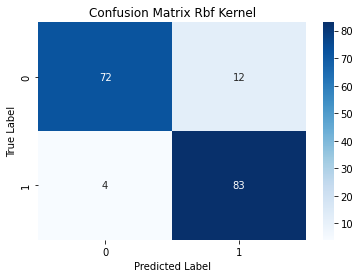

In [95]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Rbf.fit(Xtrain1, ytrain1)
ypred = Rbf.predict(Xvalid1)
# membuat confusion matrix
cm = confusion_matrix(yvalid1, ypred)
# membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix Rbf Kernel")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [96]:
# Modeling Support Vector Machine
Rbf.fit(Xtrain1, ytrain1)
ypred = Rbf.predict(Xvalid1)
print ("Hasil Klasifikasi Report\n")
print (classification_report(yvalid1, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        84
           1       0.87      0.95      0.91        87

    accuracy                           0.91       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.91      0.91      0.91       171



#### CV = 10

#### UJI DATA TRAINING DAN MODELING POLYNOMIAL KERNEL

##### PolynomianKernell

In [97]:
kfold15 = KFold(n_splits=10, random_state=42, shuffle=True)
Poli = svm.SVC(kernel='poly', degree=3, C=1)
results = cross_val_score(Bnb, Xtraining, ytraining, cv=kfold15)

In [98]:
# Membagi data menjadi 2 dataset (Training dan Testing)
for i, (train_index, test_index) in enumerate(kfold15.split(Xtraining, ytraining)):
    Xtrain1, Xvalid1 = Xtraining.iloc[train_index], Xtraining.iloc[test_index]
    ytrain1, yvalid1 = ytraining.iloc[train_index], ytraining.iloc[test_index]

In [99]:
print('\nDimension of Xtrain :',Xtrain1.shape)
print('\nDimension of Xtest :',Xvalid1.shape)
print('\nDimension of Ytrain :',ytrain1.shape)
print('\nDimension of Ytest :',yvalid1.shape)


Dimension of Xtrain : (1078, 4)

Dimension of Xtest : (119, 4)

Dimension of Ytrain : (1078,)

Dimension of Ytest : (119,)


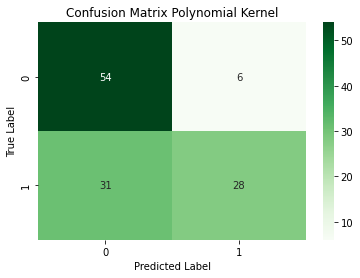

In [100]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Poli.fit(Xtrain1, ytrain1)
ypred = Poli.predict(Xvalid1)
# membuat confusion matrix
cm = confusion_matrix(yvalid1, ypred)
# membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Greens")
plt.title("Confusion Matrix Polynomial Kernel")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [101]:
# Modeling Support Vector Machine
Poli.fit(Xtrain1, ytrain1)
ypred = Poli.predict(Xvalid1)
print ("Hasil Klasifikasi Report\n")
print (classification_report(yvalid, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       0.64      0.90      0.74        60
           1       0.82      0.47      0.60        59

    accuracy                           0.69       119
   macro avg       0.73      0.69      0.67       119
weighted avg       0.73      0.69      0.67       119



#### UJI DATA TRAINING DAN MODELING RBF KERNEL

##### RBFKernell

In [102]:
kfold16 = KFold(n_splits=10, random_state=42, shuffle=True)
Rbf = svm.SVC(kernel='rbf', gamma='scale', C=1)
results = cross_val_score(Bnb, Xtraining, ytraining, cv=kfold16)

In [103]:
# Membagi data menjadi 2 dataset (Training dan Testing)
for i, (train_index, test_index) in enumerate(kfold16.split(Xtraining, ytraining)):
    Xtrain1, Xvalid1 = Xtraining.iloc[train_index], Xtraining.iloc[test_index]
    ytrain1, yvalid1 = ytraining.iloc[train_index], ytraining.iloc[test_index]

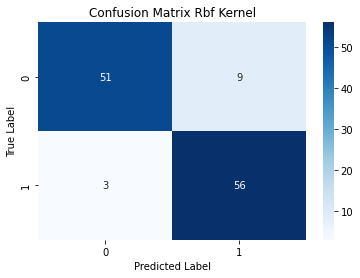

In [104]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Rbf.fit(Xtrain1, ytrain1)
ypred = Rbf.predict(Xvalid1)
# membuat confusion matrix
cm = confusion_matrix(yvalid1, ypred)
# membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix Rbf Kernel")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [105]:
# Modeling Support Vector Machine
Rbf.fit(Xtrain1, ytrain1)
ypred = Rbf.predict(Xvalid1)
print ("Hasil Klasifikasi Report\n")
print (classification_report(yvalid1, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        60
           1       0.86      0.95      0.90        59

    accuracy                           0.90       119
   macro avg       0.90      0.90      0.90       119
weighted avg       0.90      0.90      0.90       119



### UJI DATA TESTING (NORMALISASI Z-SCORE)

#### UJI DATA TESTING 1

#### GAUSSIAN NAIVE BAYES

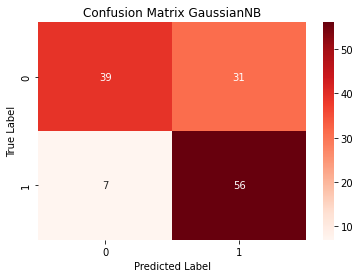

In [106]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Gnb.fit(Xtrain1, ytrain1)
ypred = Gnb.predict(Xtesting)
# membuat confusion matrix
cm = confusion_matrix(ytesting, ypred)
# membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Reds")
plt.title("Confusion Matrix GaussianNB")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [107]:
# Modeling Naive Bayes
Gnb.fit(Xtrain1, ytrain1)
ypred = Gnb.predict(Xtesting) 
print ("Hasil Klasifikasi Report\n")
print (classification_report(ytesting, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       0.85      0.56      0.67        70
           1       0.64      0.89      0.75        63

    accuracy                           0.71       133
   macro avg       0.75      0.72      0.71       133
weighted avg       0.75      0.71      0.71       133



#### BERNOULLI NAIVE BAYES

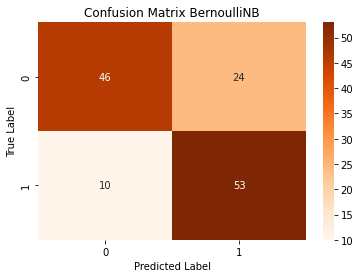

In [108]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Bnb.fit(Xtrain1, ytrain1)
ypred = Bnb.predict(Xtesting)
# membuat confusion matrix
cm = confusion_matrix(ytesting, ypred)
# membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Oranges")
plt.title("Confusion Matrix BernoulliNB")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [109]:
# Modeling Naive Bayes
Bnb.fit(Xtrain1, ytrain1)
ypred = Bnb.predict(Xtesting)
print ("Hasil Klasifikasi Report\n")
print (classification_report(ytesting, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       0.82      0.66      0.73        70
           1       0.69      0.84      0.76        63

    accuracy                           0.74       133
   macro avg       0.75      0.75      0.74       133
weighted avg       0.76      0.74      0.74       133



#### POLYNOMIAL KERNEL

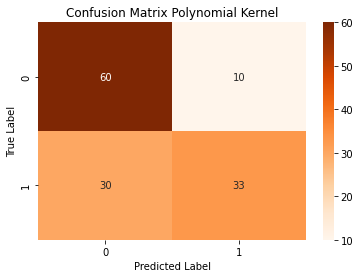

In [110]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Poli.fit(Xtrain1, ytrain1)
ypred = Poli.predict(Xtesting)
# membuat confusion matrix
cm = confusion_matrix(ytesting, ypred)
# membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Oranges")
plt.title("Confusion Matrix Polynomial Kernel")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [111]:
# Modeling Support Vector Machine
Poli.fit(Xtrain1, ytrain1)
ypred = Poli.predict(Xtesting)
print ("Hasil Klasifikasi Report\n")
print (classification_report(ytesting, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       0.67      0.86      0.75        70
           1       0.77      0.52      0.62        63

    accuracy                           0.70       133
   macro avg       0.72      0.69      0.69       133
weighted avg       0.71      0.70      0.69       133



#### RBF KERNEL

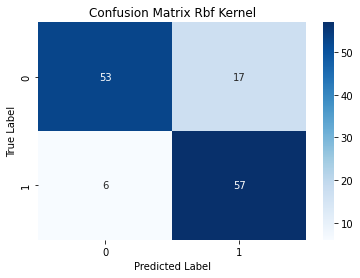

In [112]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Rbf.fit(Xtrain1, ytrain1)
ypred = Rbf.predict(Xtesting)
# membuat confusion matrix
cm = confusion_matrix(ytesting, ypred)
# membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix Rbf Kernel")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [113]:
# Modeling Support Vector Machine
Rbf.fit(Xtrain1, ytrain1)
ypred = Rbf.predict(Xtesting)
print ("Hasil Klasifikasi Report\n")
print (classification_report(ytesting, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       0.90      0.76      0.82        70
           1       0.77      0.90      0.83        63

    accuracy                           0.83       133
   macro avg       0.83      0.83      0.83       133
weighted avg       0.84      0.83      0.83       133



#### UJI DATA TESTING 2

#### GAUSSIAN NAIVE BAYES

In [114]:
# Membagi data menjadi data training dan data testing
Xtraining1, Xtesting1, ytraining1, ytesting1 = train_test_split(Xtesting, ytesting, test_size=0.1, random_state=42)
print('\nDimension of Xtrain :',Xtraining1.shape)
print('\nDimension of Xtest :',Xtesting1.shape)
print('\nDimension of Ytrain :',ytraining1.shape)
print('\nDimension of Ytest :',ytesting1.shape)


Dimension of Xtrain : (119, 4)

Dimension of Xtest : (14, 4)

Dimension of Ytrain : (119,)

Dimension of Ytest : (14,)


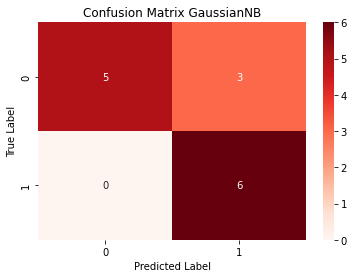

In [115]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Gnb.fit(Xtrain1, ytrain1)
ypred = Gnb.predict(Xtesting1)
# membuat confusion matrix
cm = confusion_matrix(ytesting1, ypred)
# membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Reds")
plt.title("Confusion Matrix GaussianNB")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [116]:
# Modeling Naive Bayes
Gnb.fit(Xtrain1, ytrain1)
ypred = Gnb.predict(Xtesting1) 
print ("Hasil Klasifikasi Report\n")
print (classification_report(ytesting1, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.67      1.00      0.80         6

    accuracy                           0.79        14
   macro avg       0.83      0.81      0.78        14
weighted avg       0.86      0.79      0.78        14



#### BERNOULLI NAIVE BAYES

In [117]:
# Membagi data menjadi data training dan data testing
Xtraining1, Xtesting1, ytraining1, ytesting1 = train_test_split(Xtesting, ytesting, test_size=0.1, random_state=42)
print('\nDimension of Xtrain :',Xtraining1.shape)
print('\nDimension of Xtest :',Xtesting1.shape)
print('\nDimension of Ytrain :',ytraining1.shape)
print('\nDimension of Ytest :',ytesting1.shape)


Dimension of Xtrain : (119, 4)

Dimension of Xtest : (14, 4)

Dimension of Ytrain : (119,)

Dimension of Ytest : (14,)


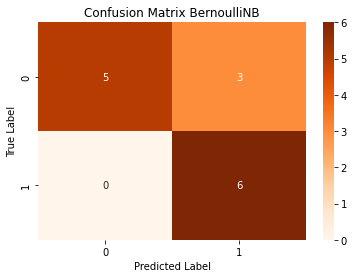

In [118]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Bnb.fit(Xtrain1, ytrain1)
ypred = Bnb.predict(Xtesting1)
# membuat confusion matrix
cm = confusion_matrix(ytesting1, ypred)
# membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Oranges")
plt.title("Confusion Matrix BernoulliNB")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [119]:
# Modeling Naive Bayes
Bnb.fit(Xtrain1, ytrain1)
ypred = Bnb.predict(Xtesting1)
print ("Hasil Klasifikasi Report\n")
print (classification_report(ytesting1, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.67      1.00      0.80         6

    accuracy                           0.79        14
   macro avg       0.83      0.81      0.78        14
weighted avg       0.86      0.79      0.78        14



#### POLYNOMIAL KERNEL

In [120]:
# Membagi data menjadi data training dan data testing
Xtraining1, Xtesting1, ytraining1, ytesting1 = train_test_split(Xtesting, ytesting, test_size=0.1, random_state=42)
print('\nDimension of Xtrain :',Xtraining1.shape)
print('\nDimension of Xtest :',Xtesting1.shape)
print('\nDimension of Ytrain :',ytraining1.shape)
print('\nDimension of Ytest :',ytesting1.shape)


Dimension of Xtrain : (119, 4)

Dimension of Xtest : (14, 4)

Dimension of Ytrain : (119,)

Dimension of Ytest : (14,)


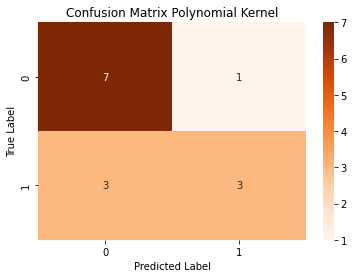

In [121]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Poli.fit(Xtrain1, ytrain1)
ypred = Poli.predict(Xtesting1)
# membuat confusion matrix
cm = confusion_matrix(ytesting1, ypred)
# membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Oranges")
plt.title("Confusion Matrix Polynomial Kernel")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [122]:
# Modeling Support Vector Machine
Poli.fit(Xtrain1, ytrain1)
ypred = Poli.predict(Xtesting1)
print ("Hasil Klasifikasi Report\n")
print (classification_report(ytesting1, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.75      0.50      0.60         6

    accuracy                           0.71        14
   macro avg       0.72      0.69      0.69        14
weighted avg       0.72      0.71      0.70        14



#### RBF KERNEL

In [123]:
# Membagi data menjadi data training dan data testing
Xtraining1, Xtesting1, ytraining1, ytesting1 = train_test_split(Xtesting, ytesting, test_size=0.1, random_state=42)
print('\nDimension of Xtrain :',Xtraining1.shape)
print('\nDimension of Xtest :',Xtesting1.shape)
print('\nDimension of Ytrain :',ytraining1.shape)
print('\nDimension of Ytest :',ytesting1.shape)


Dimension of Xtrain : (119, 4)

Dimension of Xtest : (14, 4)

Dimension of Ytrain : (119,)

Dimension of Ytest : (14,)


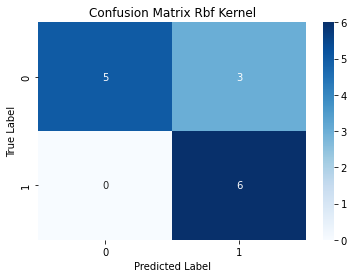

In [124]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# melakukan prediksi pada set pengujian
Rbf.fit(Xtrain1, ytrain1)
ypred = Rbf.predict(Xtesting1)
# membuat confusion matrix
cm = confusion_matrix(ytesting1, ypred)
# membuat plot confusion matrix dengan visualisasi menggunakan seaborn
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix Rbf Kernel")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [125]:
# Modeling Support Vector Machine
Rbf.fit(Xtrain1, ytrain1)
ypred = Rbf.predict(Xtesting1)
print ("Hasil Klasifikasi Report\n")
print (classification_report(ytesting1, ypred))

Hasil Klasifikasi Report

              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.67      1.00      0.80         6

    accuracy                           0.79        14
   macro avg       0.83      0.81      0.78        14
weighted avg       0.86      0.79      0.78        14

